In [112]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
from matplotlib.pyplot import*
import numpy as np
import matplotlib.pyplot as plt

In [163]:
# we define the range for the phase difference, such it can take all of the following values:
n = 20
s = [i * 2 * np.pi / n for i in range(n)]
#s

In [174]:
n1 = 100
s2 = [i * 2 * np.pi / n1 for i in range(n1)]
#s2

In [3]:
# now we construct our quantum circuit for the interferometer with one degree of freedom (the path), and assing to it each value of phi:

qasm_simulator = Aer.get_backend('qasm_simulator') # we call the backend outside of the loop

#we define empty lists to use them later to store the statistics of measuring values 0 and 1 for different values of phi
p0 = []
p1 = []

#we also consider lists for the standard deviations and errors
dp0 = []
dp1 = []

for phi in s:
    q = QuantumCircuit(1,1)
    q.h(0)
    q.p(phi,0)
    q.measure([0],[0])
    job = execute([q for i in range(50)],qasm_simulator,shots = 100000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 0 values we have for each value of phi
    temp2 = [] #will store how many 1 values we have for each value of phi

    for i in range(50):
        temp1.append(counts[i].get('0',0)/100000) #stores how many (relative population) 0 values we have (50 times) for each value of phi 
        temp2.append(counts[i].get('1',1)/100000) #stores how many (relative population) 1 values we have (50 times) for each value of phi

    p0.append(sum(temp1)/50) # takes the prob of 0 to occur for all the values of phi
    p1.append(sum(temp2)/50) # takes the prob of 1 to occur for all the values of phi
    dp0.append(np.std(temp1))
    dp1.append(np.std(temp2))

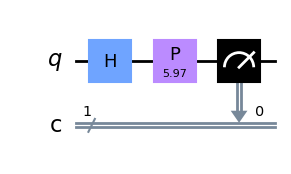

In [4]:
# we draw the circuit
q.draw('mpl')

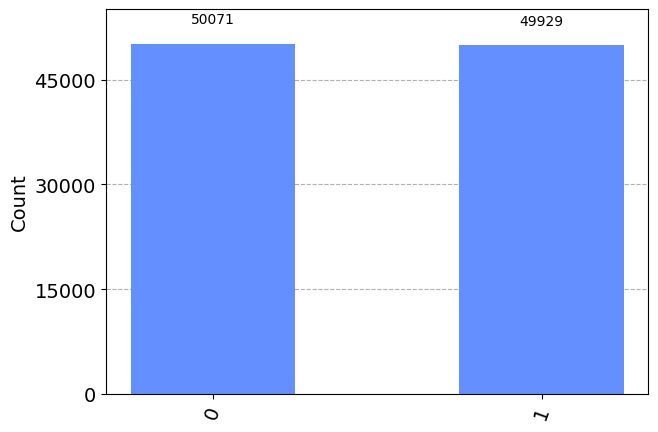

In [5]:
#we can plot an histogram for a value of phi (collected in 'counts') and for one of the 50 executions
plot_histogram(counts[1])

In [6]:
@np.vectorize
def f1(x1):
    return 1/2;
x1 = s


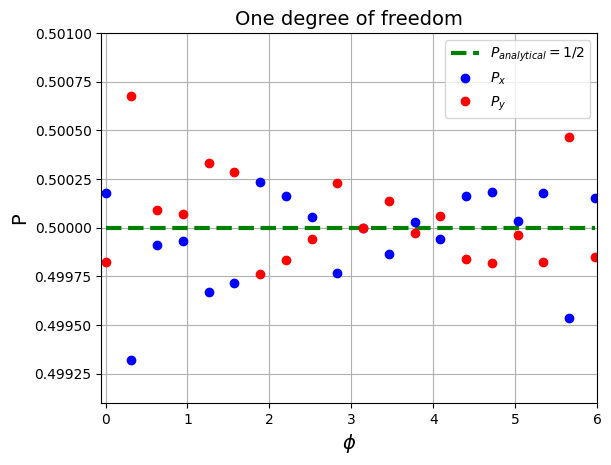

<Figure size 640x480 with 0 Axes>

In [7]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()
ax.plot(x1, f1(x1),color='green',linestyle='dashed', linewidth=3 ,label="$P_{analytical}=1/2$")
errorbar(s,p0,fmt='b.',capsize=5,label=r"$P_x$",markersize=12)
errorbar(s,p1,fmt='r.',capsize=5,label=r"$P_y$",markersize=12)
ax.set_title('One degree of freedom', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\phi$",size=14)
plt.ylabel("P",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(0.4991, 0.501)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig1.png', dpi=1000)

In [115]:
# we implement the same situation but for a beam-splitter with different values for reflection and transmission

qasm_simulator = Aer.get_backend('qasm_simulator') # we call the backend outside of the loop

#we define empty lists to use them later to store the statistics of measuring values 0 and 1 for different values of phi
p0 = []
p1 = []

#we also consider lists for the standard deviations and errors
dp0 = []
dp1 = []
phi = np.pi
for theta1 in s:
    q = QuantumCircuit(1,1)
    q.ry(theta1,0)
    q.x(0)
    q.p(phi,0)
    q.measure([0],[0])
    job = execute([q for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 0 values we have for each value of phi
    temp2 = [] #will store how many 1 values we have for each value of phi

    for i in range(50):
        temp1.append(counts[i].get('0',0)/1000) #stores how many (relative population) 0 values we have (50 times) for each value of phi 
        temp2.append(counts[i].get('1',1)/1000) #stores how many (relative population) 1 values we have (50 times) for each value of phi

    p0.append(sum(temp1)/50) # takes the prob of 0 to occur for all the values of phi
    p1.append(sum(temp2)/50) # takes the prob of 1 to occur for all the values of phi
    dp0.append(np.std(temp1))
    dp1.append(np.std(temp2))

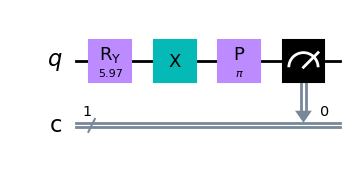

In [116]:
q.draw('mpl')

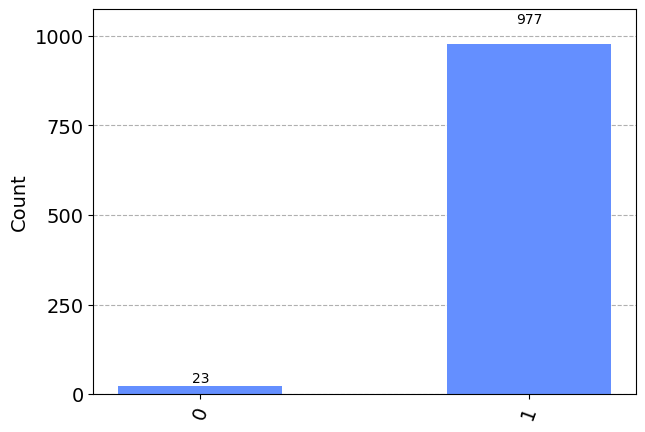

In [117]:
plot_histogram(counts[1])

In [148]:
def fn1(xa):
    return np.abs(np.sin(xa));
xa = s

In [149]:
def fn2(xa):
    return np.abs(np.cos(xa));
xa = s

In [150]:
x1 = s

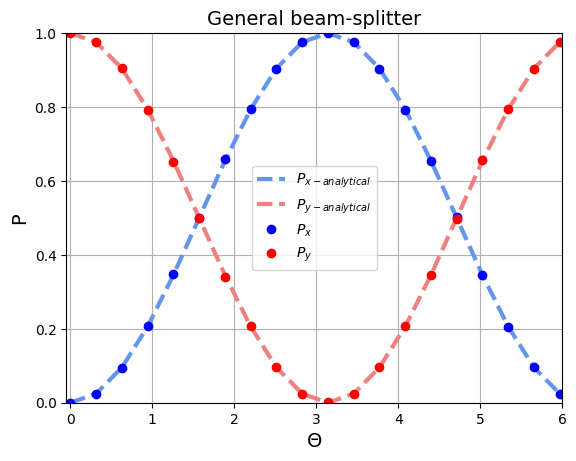

<Figure size 640x480 with 0 Axes>

In [132]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()
ax.plot(x1, fn1(xa),color='cornflowerblue',linestyle='dashed', linewidth=3 ,label="$P_{x-analytical}$")
ax.plot(x1, fn2(xa),color='lightcoral',linestyle='dashed', linewidth=3 ,label="$P_{y-analytical}$")
errorbar(s,p0,fmt='b.',capsize=5,label=r"$P_x$",markersize=12)
errorbar(s,p1,fmt='r.',capsize=5,label=r"$P_y$",markersize=12)
ax.set_title('General beam-splitter', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("P",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(0, 1)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig9.png', dpi=1000)

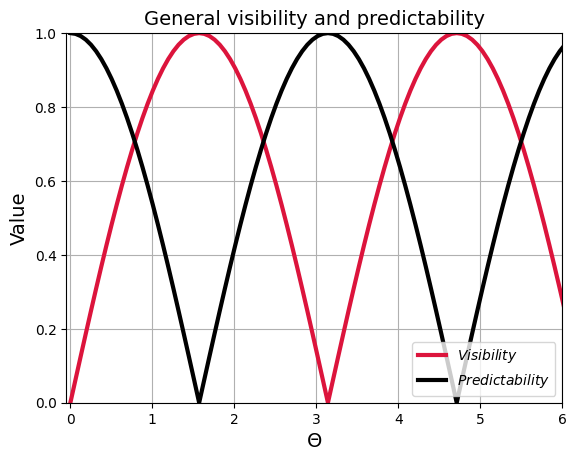

<Figure size 640x480 with 0 Axes>

In [151]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()
ax.plot(x1, fn1(xa),color='crimson',linestyle='solid', linewidth=3 ,label="$Visibility$")
ax.plot(x1, fn2(xa),color='black',linestyle='solid', linewidth=3 ,label="$Predictability$")

ax.set_title('General visibility and predictability', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("Value",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(0, 1)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig8.png', dpi=1000)

In [8]:
# we define a circuit q1 simulating the interferometer for two degrees of freedom:

theta=np.pi/2
phi=np.pi

q1 = QuantumCircuit(2,2)
q1.h(0)
q1.cry(theta,0,1,ctrl_state=0)
q1.p(phi,0)

q1.measure(0,0)
q1.measure(1,1)

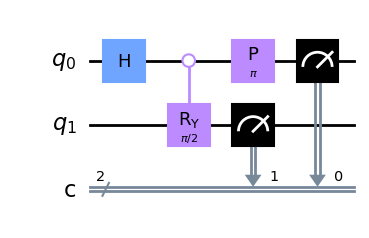

In [9]:
q1.draw('mpl')

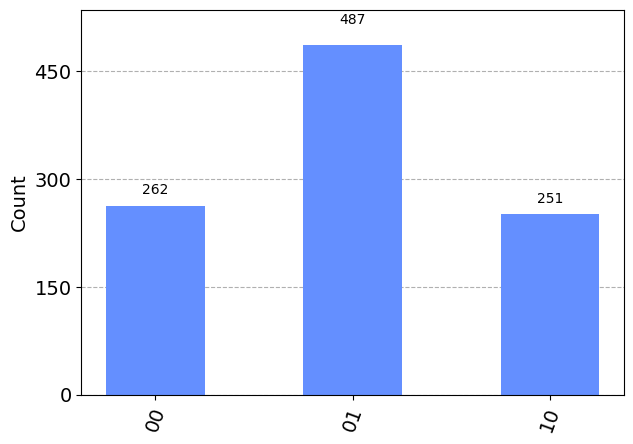

In [10]:
job = execute(q1,qasm_simulator,shots = 1000) 
counts = job.result().get_counts()
plot_histogram(counts)

In [106]:
def f2(x2):
    return (1/2)*(np.cos(x2))**2;
x2 = s1

In [13]:
def f3(x2):
    return (1/2)*(np.sin(x2))**2;
x2 = s1

In [164]:
@np.vectorize
def f4(x1):
    return 0;
x1 = s


In [15]:
# we can make plots for different values of theta and fixed values of phi:

#we define empty lists to use them later to store the statistics of measuring values 00, 01, 10, 11 for different values of theta and phi
p00 = []
p01 = []
p10 = []
p11 = []

#we also consider lists for the standard deviations and errors
dp00 = []
dp01 = []
dp10 = []
dp11 = []

phi_1 = np.pi

for theta in s:
    q1 = QuantumCircuit(2,2)
    q1.h(0)
    q1.cry(theta,0,1,ctrl_state = 0)
    q1.p(phi_1,0)
    q1.measure([0],[0])
    q1.measure([1],[1])
    job = execute([q1 for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 00 values we have for each value of theta
    temp2 = [] #will store how many 01 values we have for each value of theta
    temp3 = [] #will store how many 10 values we have for each value of theta
    temp4 = [] #will store how many 11 values we have for each value of theta

    for i in range(50):
        temp1.append(counts[i].get('00',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        temp2.append(counts[i].get('10',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        temp3.append(counts[i].get('01',2)/1000) #stores how many (relative population) 10 values we have (50 times) for each value of theta 
        temp4.append(counts[i].get('11',3)/1000) #stores how many (relative population) 11 values we have (50 times) for each value of theta

    p00.append(sum(temp1)/50) # takes the prob of 00 to occur for all the values of theta
    p01.append(sum(temp2)/50) # takes the prob of 01 to occur for all the values of theta
    p10.append(sum(temp3)/50) # takes the prob of 10 to occur for all the values of theta
    p11.append(sum(temp4)/50) # takes the prob of 11 to occur for all the values of theta
    dp00.append(np.std(temp1))
    dp01.append(np.std(temp2))
    dp10.append(np.std(temp3))
    dp11.append(np.std(temp4))

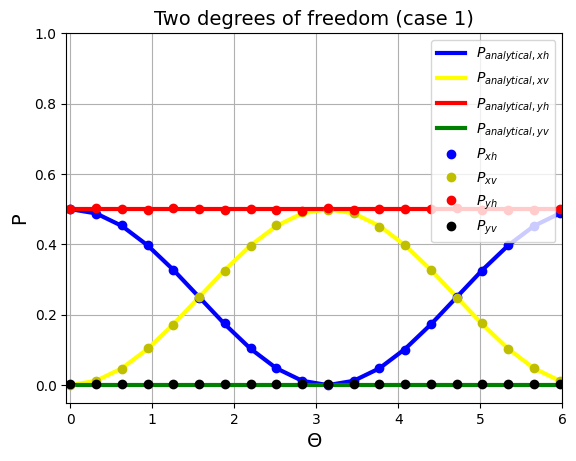

<Figure size 640x480 with 0 Axes>

In [25]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()
ax.plot(x1, f2(x2),color='blue', linewidth=3 ,label="$P_{analytical,xh}$")
ax.plot(x1, f3(x2),color='yellow', linewidth=3 ,label="$P_{analytical,xv}$")
ax.plot(x1, f1(x1),color='red', linewidth=3 ,label="$P_{analytical,yh}$")
ax.plot(x1, f4(x1),color='green', linewidth=3 ,label="$P_{analytical,yv}$")

errorbar(s,p00,fmt='b.',capsize=5,label=r"$P_{xh}$",markersize=12)
errorbar(s,p01,fmt='y.',capsize=5,label=r"$P_{xv}$",markersize=12)
errorbar(s,p10,fmt='r.',capsize=5,label=r"$P_{yh}$",markersize=12)
errorbar(s,p11,fmt='k.',capsize=5,label=r"$P_{yv}$",markersize=12)

ax.set_title('Two degrees of freedom (case 1)', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("P",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig2.png', dpi=1000)

In [29]:
def f5(x2):
    return np.absolute(np.cos(x2));
x2 = s1

In [30]:
def f6(x2):
    return np.absolute(np.sin(x2));
x2 = s1

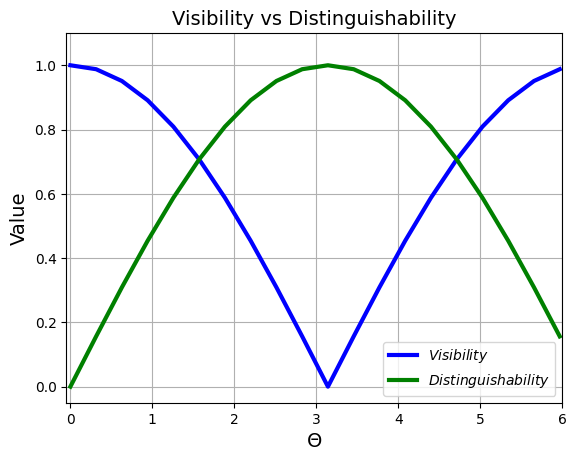

<Figure size 640x480 with 0 Axes>

In [35]:
# PLotting visibility and distinguishability
fig, ax = plt.subplots()
ax.plot(x1, f5(x2),color='blue', linewidth=3 ,label="$Visibility$")
ax.plot(x1, f6(x2),color='green', linewidth=3 ,label="$Distinguishability$")

ax.set_title('Visibility vs Distinguishability', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("Value",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1.1)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig3.png', dpi=1000)

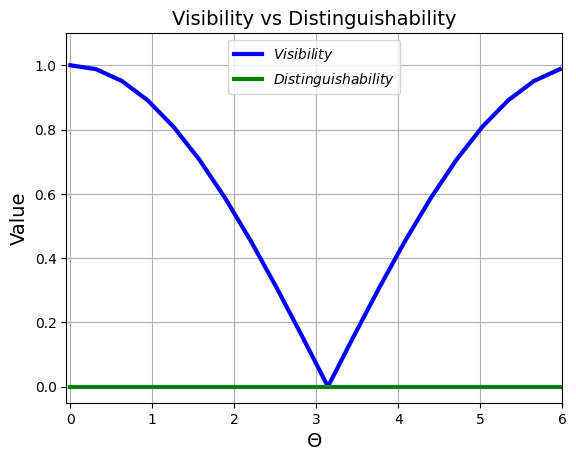

<Figure size 640x480 with 0 Axes>

In [37]:
# PLotting visibility and distinguishability
fig, ax = plt.subplots()
ax.plot(x1, f5(x2),color='blue', linewidth=3 ,label="$Visibility$")
ax.plot(x1, f4(x1),color='green', linewidth=3 ,label="$Distinguishability$")

ax.set_title('Visibility vs Distinguishability', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("Value",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1.1)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig4.png', dpi=1000)

In [165]:
# we can consider the case 2 for this interferometer

phi_2 = np.pi

p00 = []
p01 = []
p10 = []
p11 = []

dp00 = []
dp01 = []
dp10 = []
dp11 = []

for theta in s:
    q2 = QuantumCircuit(2,2)
    q2.ry(2*theta,1)
    q2.cx(1,0)
    q2.p(phi_2,0)

    q2.measure([0],[0])
    q2.measure([1],[1])

    job = execute([q2 for i in range(50)],qasm_simulator,shots = 1000)
    counts = job.result().get_counts()

    temp1 = [] 
    temp2 = [] 
    temp3 = []
    temp4 = [] 

    for i in range(50):
        temp1.append(counts[i].get('00',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        temp2.append(counts[i].get('10',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        temp3.append(counts[i].get('01',2)/1000) #stores how many (relative population) 10 values we have (50 times) for each value of theta 
        temp4.append(counts[i].get('11',3)/1000) #stores how many (relative population) 11 values we have (50 times) for each value of theta

    p00.append(sum(temp1)/50) # takes the prob of 00 to occur for all the values of theta
    p01.append(sum(temp2)/50) # takes the prob of 01 to occur for all the values of theta
    p10.append(sum(temp3)/50) # takes the prob of 10 to occur for all the values of theta
    p11.append(sum(temp4)/50) # takes the prob of 11 to occur for all the values of theta
    dp00.append(np.std(temp1))
    dp01.append(np.std(temp2))
    dp10.append(np.std(temp3))
    dp11.append(np.std(temp4))

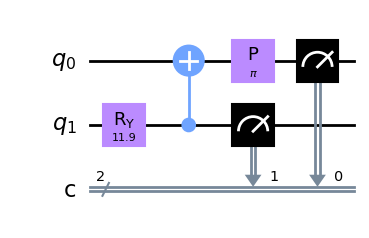

In [166]:
q2.draw('mpl')

In [175]:
def f12(x):
    return np.cos(x)**2
x = s2

In [176]:
def f22(x):
    return np.sin(x)**2
x = s2

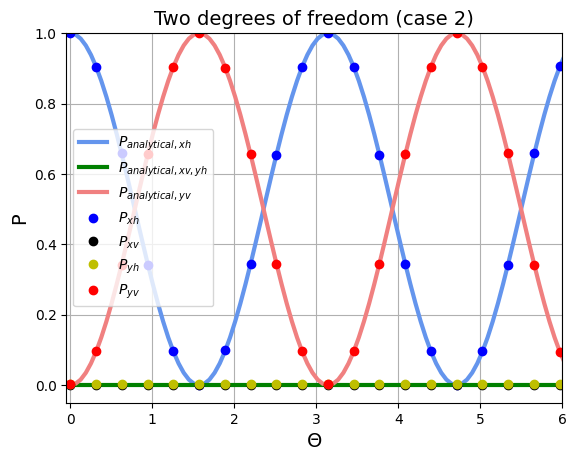

<Figure size 640x480 with 0 Axes>

In [179]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()
ax.plot(x, f12(x),color='cornflowerblue', linewidth=3 ,label="$P_{analytical,xh}$")
ax.plot(x1, f4(x1),color='green', linewidth=3 ,label="$P_{analytical,xv,yh}$")
ax.plot(x, f22(x),color='lightcoral', linewidth=3 ,label="$P_{analytical,yv}$")

errorbar(s,p00,fmt='b.',capsize=5,label=r"$P_{xh}$",markersize=12)
errorbar(s,p01,fmt='k.',capsize=5,label=r"$P_{xv}$",markersize=12)
errorbar(s,p10,fmt='y.',capsize=5,label=r"$P_{yh}$",markersize=12)
errorbar(s,p11,fmt='r.',capsize=5,label=r"$P_{yv}$",markersize=12)

ax.set_title('Two degrees of freedom (case 2)', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("P",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig4.png', dpi=1000)